In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Download the image assets( FG, FG_MASK, BG) from drive

In [0]:
# Background Images
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Input/bg  /content/
# Foreground Images
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Input/fg150  /content/
# Foreground Masks
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Input/fg_mask  /content/

## Download the Dataset.zip from drive which contains Overlay, Masks and Depth images

In [0]:
# Background Images
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Output/Dataset.zip  /content/
! unzip -q Dataset.zip -d Dataset
!rm -r Dataset.zip

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_images(images: list, imgName):
    n: int = len(images)
    f = plt.figure(figsize=(20,5))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1).axis('off')
        plt.imshow(images[i], cmap="gray")
        plt.savefig(imgName)

    plt.show(block=True)

INPUTS
1. Background Images (Scenes) = 100


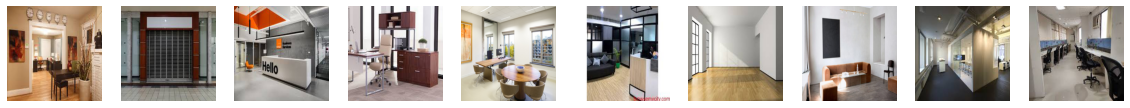

2. Foreground Images with Transparent Background = 100


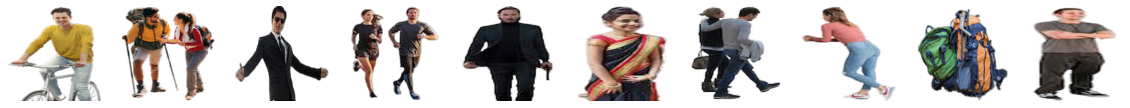

3. Mask for foreground = 100


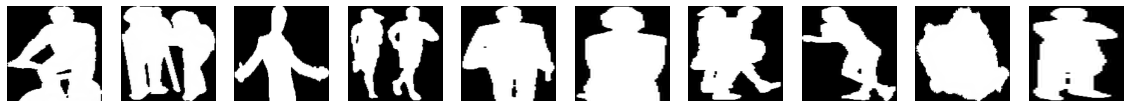

OUTPUTS
4. Overlay the foreground on top or background randomly. Flip foreground as well. We call this fg_bg = 400000


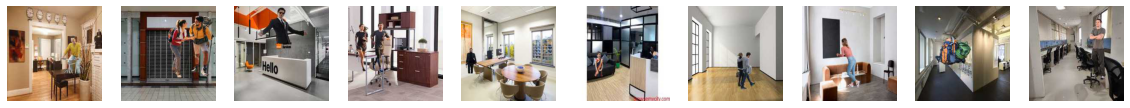

5. Mask for foreground in the Overlayed Image(fg_bg) = 400000


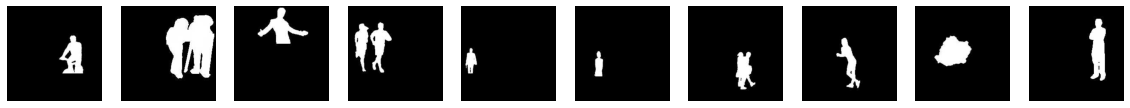

6. Depth map generated for Overlayed images(fg_bg) = 400000


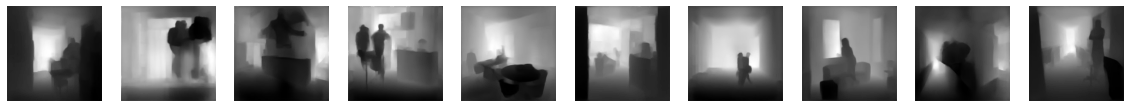

In [80]:
from os import listdir

# from google.colab.patches import cv2_imshow
# import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import PIL
from PIL import Image
import time

%matplotlib inline
import os, errno

# Paths used
DB_name = 'Dataset/'
path_BG = 'bg'
path_FG = 'fg150'
path_fg_mask = 'fg_mask'
bg_imageListDir = listdir(path_BG)
fg_imageListDir = listdir(path_FG)

program_starts = time.time()
bg_imgs = []
fg_imgs = []
fg_mask_imgs = []
overlay_imgs = []
overlay_mask_imgs = []
depth_imgs = []
for i in range(40,50):
  bg_image = bg_imageListDir[i]
  outputDir = DB_name
  outputDir = outputDir + bg_image[:-4]
  bg_img = Image.open(path_BG+'/'+bg_image).resize((224,224), Image.ANTIALIAS)
  bg_imgs.append(np.asarray(bg_img))

  # for fgID,fg_image in enumerate(fg_imageListDir):
  fg_image = fg_imageListDir[i]
  outputDir_fg = outputDir + '/' + fg_image[:-4]
  fg_img  = Image.open(path_FG+'/'+fg_image).resize((150,150), Image.ANTIALIAS)
  fg_mask = Image.open(path_fg_mask+'/mask_'+fg_image).resize((150,150), Image.ANTIALIAS)

  imgNum = np.random.randint(1,41)
  overlay = Image.open(outputDir_fg + "/overlay/" + str(imgNum) + '.jpg' )
  mask = Image.open(outputDir_fg + "/mask/" + str(imgNum) + '.jpg' )
  depth = Image.open(outputDir_fg + "/depth/" + str(imgNum) + '.jpg' )

  fg_imgs.append(np.asarray(fg_img))
  fg_mask_imgs.append(np.asarray(fg_mask))

  overlay_imgs.append(np.asarray(overlay))
  overlay_mask_imgs.append(np.asarray(mask))
  depth_imgs.append(np.asarray(depth))




print("INPUTS")
print("1. Background Images (Scenes) = 100")
show_images(bg_imgs, "bg_imgs.png")
print("2. Foreground Images with Transparent Background = 100")
show_images(fg_imgs, "fg_imgs.png")
print("3. Mask for foreground = 100")
show_images(fg_mask_imgs, "fg_mask_imgs.png")

print("OUTPUTS")
print("4. Overlay the foreground on top or background randomly. Flip foreground as well. We call this fg_bg = 400000")
show_images(overlay_imgs, "overlay_imgs.png")
print("5. Mask for foreground in the Overlayed Image(fg_bg) = 400000")
show_images(overlay_mask_imgs, "overlay_mask_imgs.png")
print("6. Depth map generated for Overlayed images(fg_bg) = 400000")
show_images(depth_imgs, "depth_imgs.png")